In [53]:
import pandas
import numpy
import math

import matplotlib
from matplotlib import pyplot

import seaborn

from scipy.stats import mode
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.learning_curve import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV

from sklearn import metrics

%matplotlib inline

import warnings
warnings.simplefilter('ignore')

In [4]:
#load csv
insurance_data_frame = pandas.read_csv('data/insurance.csv')

In [5]:
insurance_data_frame.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


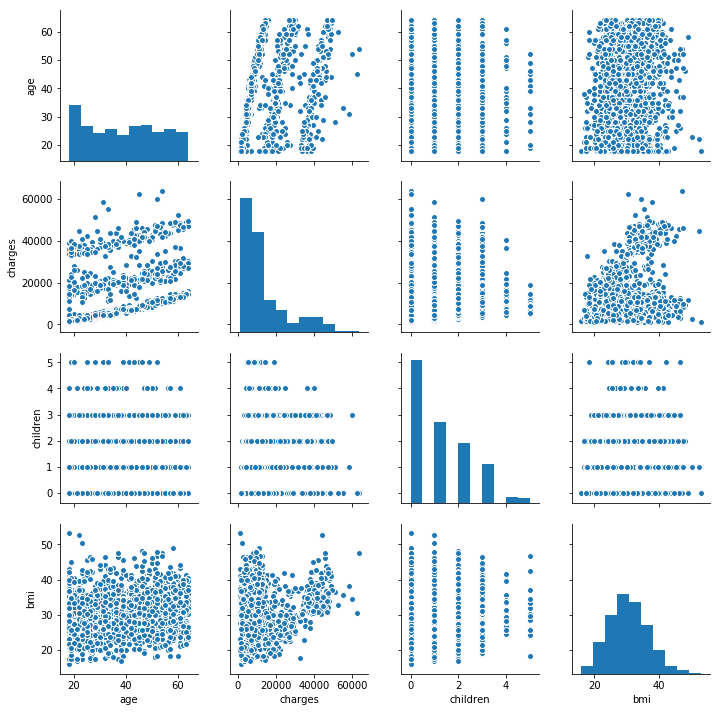

In [6]:
#visualizing and understanding data
seaborn.pairplot(data=insurance_data_frame[['age', 'charges', 'children', 'bmi']]) 

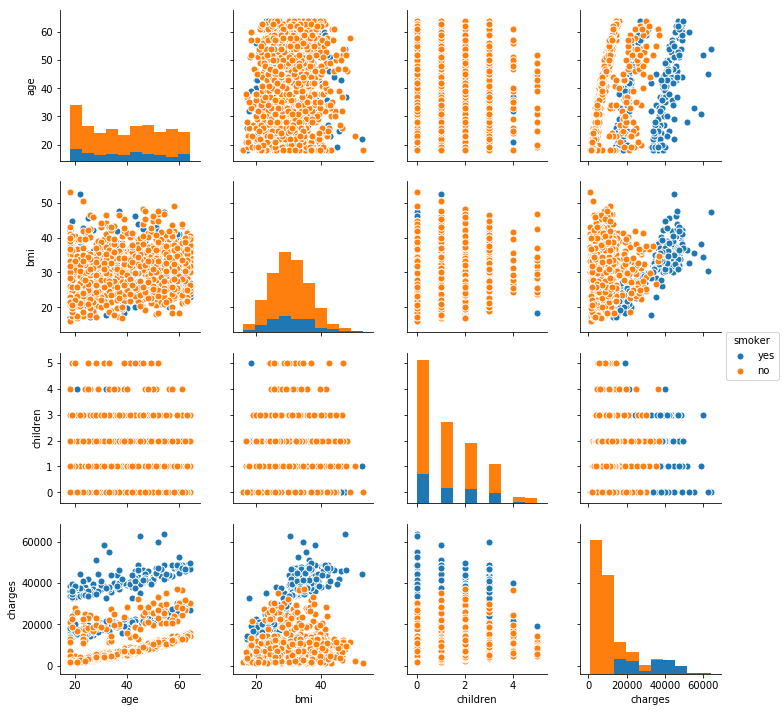

In [7]:
seaborn.pairplot(data=insurance_data_frame, hue='smoker', plot_kws={"s": 50})

In [8]:
#data transformation
transformed_insurance_data_frame = insurance_data_frame.copy(deep=True)
transformed_insurance_data_frame['is_male'] = transformed_insurance_data_frame['sex'].apply(
    lambda value: 1 if value == 'male' else 0)
transformed_insurance_data_frame['is_smoker'] = transformed_insurance_data_frame['smoker'].apply(
    lambda value: 1 if value == 'yes' else 0)
transformed_insurance_data_frame = pandas.get_dummies(transformed_insurance_data_frame,\
    columns=["region"])
transformed_insurance_data_frame['charges'] = transformed_insurance_data_frame['charges'].divide(1000)

transformed_insurance_data_frame.head()

,age,sex,bmi,children,smoker,charges,is_male,is_smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16.884924,0,1,0,0,0,1
1,18,male,33.770,1,no,1.725552,1,0,0,0,1,0
2,28,male,33.000,3,no,4.449462,1,0,0,0,1,0
3,33,male,22.705,0,no,21.984471,1,0,0,1,0,0
4,32,male,28.880,0,no,3.866855,1,0,0,1,0,0


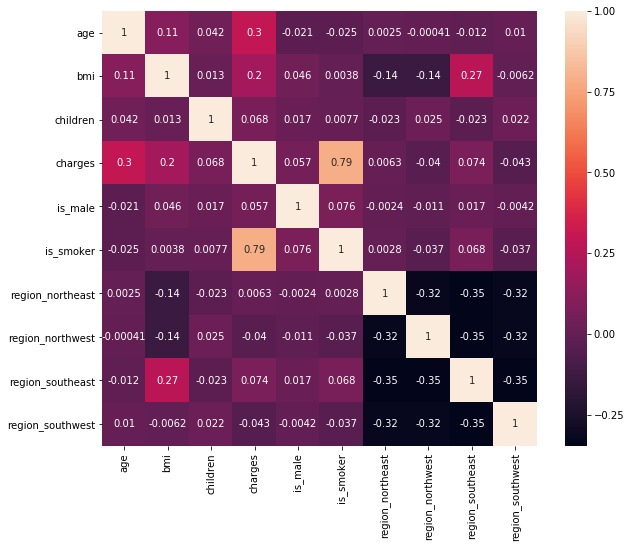

In [9]:
f,ax = pyplot.subplots(figsize=(10, 8))
seaborn.heatmap(transformed_insurance_data_frame.corr(), annot=True, square=True, ax=ax)

In [10]:
#building training set
train_data_frame = transformed_insurance_data_frame.drop(columns=['sex', 'smoker'])
test_data_frame = train_data_frame.sample(frac=0.25)
train_data_frame = train_data_frame.loc[~(train_data_frame.index.isin(test_data_frame.index))]

train_input = train_data_frame.drop(columns=['charges']).values
train_output = train_data_frame['charges'].values

test_input = test_data_frame.drop(columns=['charges']).values
test_output = test_data_frame['charges'].values

In [11]:
#training a model
linear_model = LinearRegression()
linear_model.fit(train_input, train_output.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
output_prediction = linear_model.predict(train_input)

In [13]:
output_prediction[:5]

array([[25.30381167],
       [ 3.65636256],
       [ 3.87576371],
       [ 5.71864963],
       [ 4.06227745]])

In [14]:
prediction_list = output_prediction.reshape(-1,)
prediction_list[:5]

array([25.30381167,  3.65636256,  3.87576371,  5.71864963,  4.06227745])

In [15]:
train_input[:5]

array([[19.   , 27.9  ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,
         1.   ],
       [18.   , 33.77 ,  1.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ],
       [33.   , 22.705,  0.   ,  1.   ,  0.   ,  0.   ,  1.   ,  0.   ,
         0.   ],
       [32.   , 28.88 ,  0.   ,  1.   ,  0.   ,  0.   ,  1.   ,  0.   ,
         0.   ],
       [31.   , 25.74 ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ]])

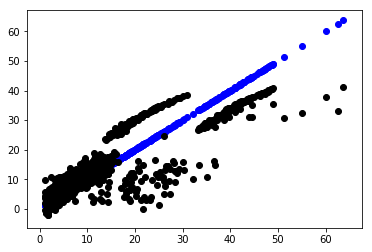

In [16]:
#visualizing results
pyplot.scatter(train_data_frame['charges'], train_output,\
    color='blue')
pyplot.scatter(train_data_frame['charges'], prediction_list,\
    color='black')

In [17]:
test_output_prediction = linear_model.predict(test_input)
test_prediction_list = test_output_prediction.reshape(-1,)

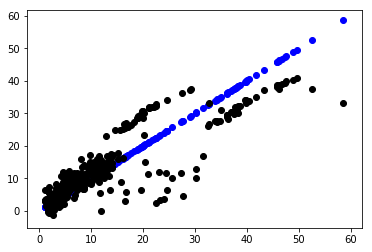

In [18]:
#visualizing results
pyplot.scatter(test_data_frame['charges'], test_output,\
    color='blue')
pyplot.scatter(test_data_frame['charges'], test_prediction_list,\
    color='black')

In [19]:
# error for mean line
metrics.mean_squared_error(train_output, numpy.full((len(train_output)), train_output.mean()))

147.6222753121836

In [20]:
#train error
metrics.mean_squared_error(train_output, prediction_list)

36.67523117766498

In [21]:
#test error
metrics.mean_squared_error(test_output, test_prediction_list)

36.14135255728085

In [22]:
# The coefficients

print(linear_model.coef_)
print(linear_model.intercept_)

[[ 0.26054489  0.34063657  0.39109206 -0.145235   23.88324116  0.43949512
   0.25145835 -0.22000512 -0.47094834]]
[-12.56259436]


In [23]:
'''
resources:

http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
https://www.kaggle.com/mirichoi0218/insurance
'''

'\nresources:\n\nhttp://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html\nhttps://www.kaggle.com/mirichoi0218/insurance\n'

In [24]:
#polynomial regression
degrees = 3
polynomial_regression_model = make_pipeline(PolynomialFeatures(degrees),
                                            LinearRegression())

polynomial_regression_model.fit(train_input, train_output.reshape(-1, 1))

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [25]:
train_output_prediction = polynomial_regression_model.predict(train_input)
train_prediction_list = train_output_prediction.reshape(-1,)

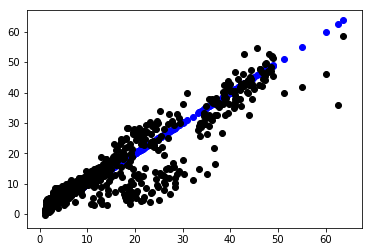

In [26]:
#visualizing results
pyplot.scatter(train_data_frame['charges'], train_output,\
    color='blue')
pyplot.scatter(train_data_frame['charges'], train_prediction_list,\
    color='black')

In [27]:
#train error
metrics.mean_squared_error(train_output, train_prediction_list)

20.537015059649264

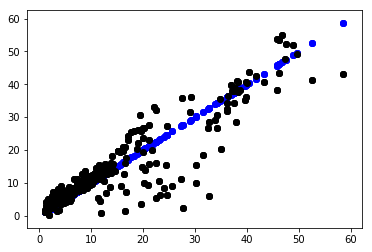

In [28]:
test_output_prediction = polynomial_regression_model.predict(test_input)
test_prediction_list = test_output_prediction.reshape(-1,)

#visualizing results
for i in range(3):
    pyplot.scatter(test_data_frame['charges'], test_output,\
        color='blue')
    pyplot.scatter(test_data_frame['charges'], test_prediction_list,\
        color='black')

In [29]:
#test error
metrics.mean_squared_error(test_output, test_prediction_list)

25.039722498263153

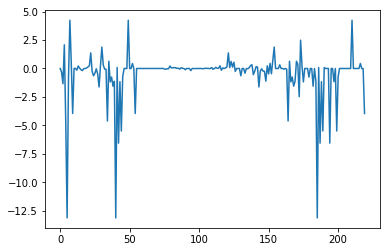

In [30]:
pyplot.plot(polynomial_regression_model.steps[1][1].coef_[0])

Text(0,0.5,'score')

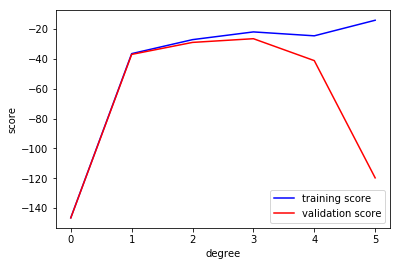

In [31]:
#validation curve

degree_list = numpy.arange(0, 6)

complete_input_data_frame = transformed_insurance_data_frame.drop(columns=['sex', 'smoker'])

complete_input = complete_input_data_frame.drop(columns=['charges']).values
complete_output = complete_input_data_frame['charges'].values

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

train_score_list, validation_score_list = validation_curve(PolynomialRegression(),
    complete_input, complete_output, param_name='polynomialfeatures__degree', param_range=degree_list, cv=10,
    scoring='neg_mean_squared_error')

# print(train_score_list)
# numpy.mean(train_score_list, 1)
pyplot.plot(degree_list, numpy.mean(train_score_list, 1), color='blue', label='training score')
pyplot.plot(degree_list, numpy.mean(validation_score_list, 1), color='red', label='validation score')
pyplot.legend(loc='best')
# pyplot.ylim(0, 1)
pyplot.xlabel('degree')
pyplot.ylabel('score')

In [32]:
#ridge polynomial regression
degrees = 3
ridge_polynomial_regression_model = make_pipeline(PolynomialFeatures(degrees),
                                            Ridge())

ridge_polynomial_regression_model.fit(train_input, train_output.reshape(-1, 1))

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [33]:
train_output_prediction = ridge_polynomial_regression_model.predict(train_input)
train_prediction_list = train_output_prediction.reshape(-1,)

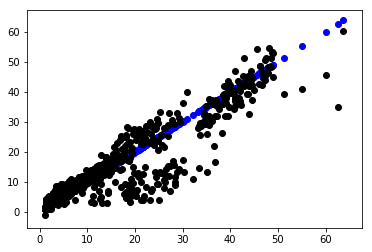

In [34]:
#visualizing results
pyplot.scatter(train_data_frame['charges'], train_output,\
    color='blue')
pyplot.scatter(train_data_frame['charges'], train_prediction_list,\
    color='black')

In [35]:
#train error
metrics.mean_squared_error(train_output, train_prediction_list)

20.750999744488624

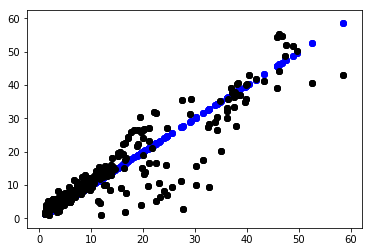

In [36]:
test_output_prediction = ridge_polynomial_regression_model.predict(test_input)
test_prediction_list = test_output_prediction.reshape(-1,)

#visualizing results
for i in range(3):
    pyplot.scatter(test_data_frame['charges'], test_output,\
        color='blue')
    pyplot.scatter(test_data_frame['charges'], test_prediction_list,\
        color='black')

In [37]:
#test error
metrics.mean_squared_error(test_output, test_prediction_list)

24.11391033185963

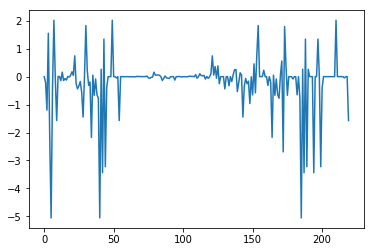

In [38]:
pyplot.plot(ridge_polynomial_regression_model.steps[1][1].coef_[0])

Text(0,0.5,'score')

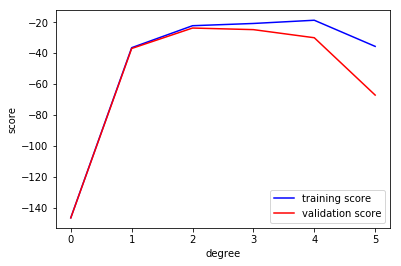

In [39]:
#validation curve

degree_list = numpy.arange(0, 6)

complete_input_data_frame = transformed_insurance_data_frame.drop(columns=['sex', 'smoker'])

complete_input = complete_input_data_frame.drop(columns=['charges']).values
complete_output = complete_input_data_frame['charges'].values

def RidgePolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         Ridge(**kwargs))

train_score_list, validation_score_list = validation_curve(RidgePolynomialRegression(),
    complete_input, complete_output, param_name='polynomialfeatures__degree', param_range=degree_list, cv=10,
    scoring='neg_mean_squared_error')

# print(train_score_list)
# numpy.mean(train_score_list, 1)
pyplot.plot(degree_list, numpy.mean(train_score_list, 1), color='blue', label='training score')
pyplot.plot(degree_list, numpy.mean(validation_score_list, 1), color='red', label='validation score')
pyplot.legend(loc='best')
# pyplot.ylim(0, 1)
pyplot.xlabel('degree')
pyplot.ylabel('score')

In [40]:
# model selection : parameter tuning
parameter_values_list = [
    {
        'polynomialfeatures__degree': numpy.arange(0, 4),
        'ridge__alpha': [10, 1, 1e-1, 1e-2, 1e-3, 1e-4]
    }
]

grid_search_model = GridSearchCV(RidgePolynomialRegression(), parameter_values_list, cv=10,
                       scoring='neg_mean_squared_error')
grid_search_model.fit(complete_input, complete_output)
grid_search_model.best_params_

{'polynomialfeatures__degree': 2, 'ridge__alpha': 1}

In [51]:
#recursive feature selection
rfecv = RFECV(estimator=LinearRegression(), step=1, cv=10,
              scoring='neg_mean_squared_error')

rfecv.fit(complete_input, complete_output)

complete_column_list = complete_input_data_frame.drop(columns=['charges']).columns 
# pandas.Series(index=complete_column_list, data=rfecv.get_support())
pandas.Series(index=complete_column_list, data=rfecv.ranking_)

age                 1
bmi                 1
children            1
is_male             2
is_smoker           1
region_northeast    1
region_northwest    1
region_southeast    1
region_southwest    1
dtype: int64

In [54]:
#LASSO regression
degrees = 3
lasso_polynomial_regression_model = make_pipeline(PolynomialFeatures(degrees),
                                            Lasso())

lasso_polynomial_regression_model.fit(train_input, train_output.reshape(-1, 1))

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [55]:
train_output_prediction = lasso_polynomial_regression_model.predict(train_input)
train_prediction_list = train_output_prediction.reshape(-1,)

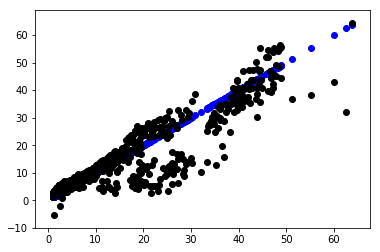

In [56]:
#visualizing results
pyplot.scatter(train_data_frame['charges'], train_output,\
    color='blue')
pyplot.scatter(train_data_frame['charges'], train_prediction_list,\
    color='black')

In [57]:
#train error
metrics.mean_squared_error(train_output, train_prediction_list)

22.885327955650524

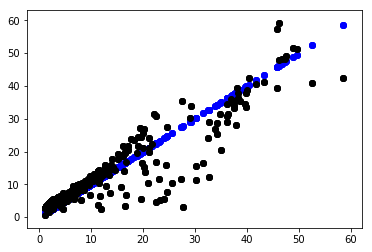

In [58]:
test_output_prediction = lasso_polynomial_regression_model.predict(test_input)
test_prediction_list = test_output_prediction.reshape(-1,)

#visualizing results
for i in range(3):
    pyplot.scatter(test_data_frame['charges'], test_output,\
        color='blue')
    pyplot.scatter(test_data_frame['charges'], test_prediction_list,\
        color='black')

In [59]:
#test error
metrics.mean_squared_error(test_output, test_prediction_list)

22.886009752149793

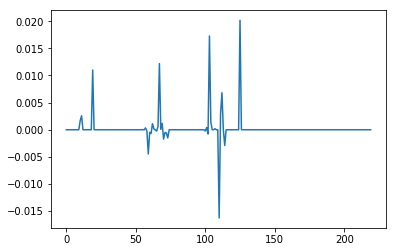

In [63]:
pyplot.plot(lasso_polynomial_regression_model.steps[1][1].coef_)

Text(0,0.5,'score')

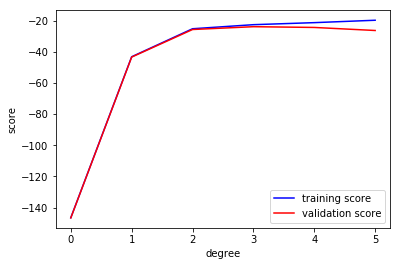

In [68]:
#validation curve

degree_list = numpy.arange(0, 6)

complete_input_data_frame = transformed_insurance_data_frame.drop(columns=['sex', 'smoker'])

complete_input = complete_input_data_frame.drop(columns=['charges']).values
complete_output = complete_input_data_frame['charges'].values

def LassoPolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         Lasso(**kwargs))

train_score_list, validation_score_list = validation_curve(LassoPolynomialRegression(),
    complete_input, complete_output, param_name='polynomialfeatures__degree', param_range=degree_list, cv=10,
    scoring='neg_mean_squared_error')

# print(train_score_list)
# numpy.mean(train_score_list, 1)
pyplot.plot(degree_list, numpy.mean(train_score_list, 1), color='blue', label='training score')
pyplot.plot(degree_list, numpy.mean(validation_score_list, 1), color='red', label='validation score')
pyplot.legend(loc='best')
# pyplot.ylim(0, 1)
pyplot.xlabel('degree')
pyplot.ylabel('score')

In [65]:
# model selection : parameter tuning
parameter_values_list = [
    {
        'polynomialfeatures__degree': numpy.arange(0, 4),
        'lasso__alpha': [10, 1, 1e-1, 1e-2, 1e-3, 1e-4]
    }
]

grid_search_model = GridSearchCV(LassoPolynomialRegression(), parameter_values_list, cv=10,
                       scoring='neg_mean_squared_error')
grid_search_model.fit(complete_input, complete_output)
grid_search_model.best_params_

{'lasso__alpha': 0.01, 'polynomialfeatures__degree': 2}

In [66]:
grid_search_model.best_score_

-23.55897264836067